<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 8**
Joshua Dollison

MAT421-16133

3/9/2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **1: Numerical Integration Problem Statement**

The class text states that the integral of a function is normally described as the “area under the curve.” In engineering and science, the integral has many applications for modeling, predicting, and understanding physical systems. However in practice, finding an exact solution for the integral of a function is difficult or impossible.  It goes on to describe the numerical integration problem: given a function defined on an interval $[a, b]$, the goal is to approximate its integral. Since in practice one often only has access to discrete data points or a discretized version of the function, a numerical grid (an evenly spaced set of points with step size $h$) is used. Each grid subinterval is treated as a small region over which the function is approximated.

### **Example 1.1**

In Chapter 21, the Numerical Integration Problem Statement introduces the concept of discretizing a continuous function over an interval using a numerical grid. In this simple example, we set up an evenly spaced grid over the interval $[0, \pi]$ and compute the values of the function $( f(x)=\sin(x) $). We then plot the resulting grid points and function values.


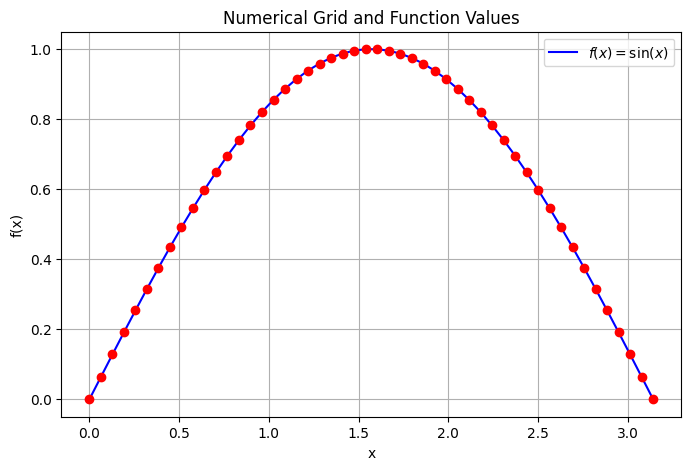

In [2]:
# Define the interval and number of grid points
a = 0
b = np.pi
n_points = 50
x = np.linspace(a, b, n_points)

# Define the function f(x) = sin(x)
f = np.sin(x)

# Plot the function evaluated on the numerical grid
plt.figure(figsize=(8, 5))
plt.plot(x, f, 'b-', label=r'$f(x)=\sin(x)$')
plt.scatter(x, f, color='red', zorder=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Numerical Grid and Function Values')
plt.legend()
plt.grid(True)
plt.show()


### **Example 1.2**

In many real-world applications, data is collected at discrete points rather than as a continuous function. In this GPT inspired real-world example we simulate a sensor measuring the pollutant concentration (in mg/L) along a river at equally spaced locations over a 100 km stretch. by evaluating a noisy sinusoidal function at evenly spaced points. This example demonstrates setting up a numerical grid and obtaining data values for later numerical integration. The function is defined as $f(x) = 10 + 5 \sin\left(\frac{\pi x}{100}\right) + \text{noise}$ where "$\text{noise}$" represents random variation.


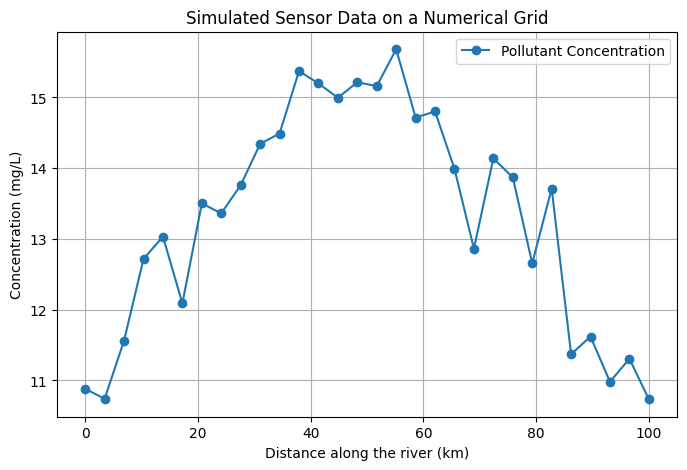

In [3]:
# Set the domain: river length from 0 to 100 km
a = 0
b = 100
n_points = 30  # number of measurement points
x = np.linspace(a, b, n_points)

# Simulate pollutant concentration with a sinusoidal pattern and some random noise
np.random.seed(0)  # for reproducibility
# Base concentration plus a sinusoidal variation (simulating periodic changes) and noise
f = 10 + 5 * np.sin(np.pi * x / 100) + np.random.normal(0, 0.5, size=x.shape)

# Plot the simulated sensor data
plt.figure(figsize=(8, 5))
plt.plot(x, f, 'o-', label='Pollutant Concentration')
plt.xlabel('Distance along the river (km)')
plt.ylabel('Concentration (mg/L)')
plt.title('Simulated Sensor Data on a Numerical Grid')
plt.legend()
plt.grid(True)
plt.show()


# **2: Riemann’s Integral**

The class text states that the simplest method for approximating integrals is by summing the area of rectangles that are defined for each subinterval. The width of the rectangle is $x+{i+1} - x_i = h$, and the height is defined by a function value $f(x)$ for some $x$ in the subinterval. An obvious choice for the height is the function value at the left endpoint, $x_i$ , or the right
endpoint, $x_{i+1}$, because these values can be used even if the function itself is not known. This method gives the Riemann Integral approximation, where the integral is approximated by summing up areas of rectangles. Depending on whether the left or right endpoints of each subinterval are used to determine the rectangle's height, you obtain the left or right Riemann sum. The chapter uses Taylor series arguments to show that the error in the Riemann approximation is proportional to h (first-order accuracy).


### **Example 2.1**

Riemann's Integral approximates the area under a curve by summing the areas of rectangles over a discretized interval. In this example, we use the function $f(x)=\sin(x)$ over the interval $[0, \pi] $. We compute a left Riemann sum and plot the function along with the rectangles representing the individual area contributions.

Left Riemann Sum: 1.9981719613436542


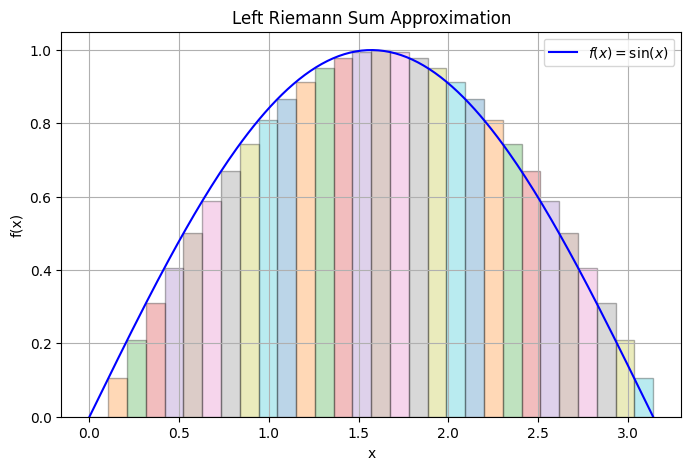

In [4]:
# Define the function and interval
a = 0
b = np.pi
n_intervals = 30  # number of subintervals
x = np.linspace(a, b, n_intervals+1)
h = (b - a) / n_intervals

# Function f(x) = sin(x)
f = np.sin(x)

# Compute the left Riemann sum (using left endpoints)
left_endpoints = x[:-1]
f_left = np.sin(left_endpoints)
riemann_sum = np.sum(f_left) * h
print("Left Riemann Sum:", riemann_sum)

# Plot the function and rectangles (left Riemann)
x_dense = np.linspace(a, b, 200)
plt.figure(figsize=(8, 5))
plt.plot(x_dense, np.sin(x_dense), 'b-', label=r'$f(x)=\sin(x)$')
for xi, fi in zip(left_endpoints, f_left):
    plt.bar(xi, fi, width=h, align='edge', alpha=0.3, edgecolor='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Left Riemann Sum Approximation')
plt.legend()
plt.grid(True)
plt.show()


### **Example 2.2**

A practical application of Riemann's Integral is the approximation of distance traveled given a velocity profile. In this GPT inspired reql-world example, suppose a vehicle's speed is modeled by $v(t)=5+\sin(t)$ (in m/s) over a time interval $[0, 2\pi]$ seconds. By computing a left Riemann sum, we can approximate the total distance traveled. The plot shows the velocity curve along with the rectangular approximations.

Approximated Distance Traveled: 31.415926535897935 meters


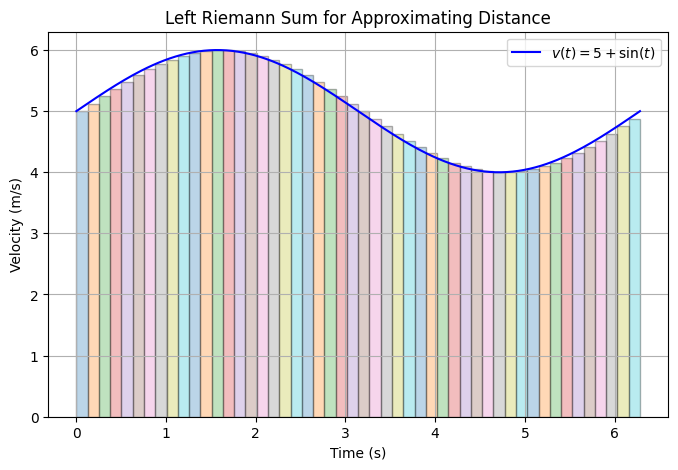

In [5]:
# Define the time interval
t_start = 0
t_end = 2 * np.pi
n_intervals = 50
t = np.linspace(t_start, t_end, n_intervals+1)
dt = (t_end - t_start) / n_intervals

# Velocity function: v(t) = 5 + sin(t)
v = 5 + np.sin(t)
left_t = t[:-1]
v_left = 5 + np.sin(left_t)

# Compute the total distance traveled using the left Riemann sum
distance = np.sum(v_left) * dt
print("Approximated Distance Traveled:", distance, "meters")

# Plot the velocity function and rectangles
t_dense = np.linspace(t_start, t_end, 200)
plt.figure(figsize=(8, 5))
plt.plot(t_dense, 5+np.sin(t_dense), 'b-', label=r'$v(t)=5+\sin(t)$')
for ti, vi in zip(left_t, v_left):
    plt.bar(ti, vi, width=dt, align='edge', alpha=0.3, edgecolor='k')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Left Riemann Sum for Approximating Distance')
plt.legend()
plt.grid(True)
plt.show()


# **3: Trapezoid Rule**

The class text states that improving on the Riemann sums, the Trapezoid Rule approximates the area under the curve by fitting a trapezoid to each subinterval. Mathematically, it combines the function values at both endpoints of each interval, effectively “averaging” the left and right values. Error analysis reveals that the Trapezoid Rule is of order $O(h^2)$, which means it tends to be significantly more accurate than a basic Riemann sum for the same grid spacing.

### **Example 3.1**

The Trapezoid Rule approximates the area under a curve by fitting trapezoids to subintervals of the domain. In this example, we again use the function $ f(x)=\sin(x) $ over $ [0, \pi] $ and compute the integral using the trapezoid rule. The code calculates the approximate integral and plots the function along with the trapezoidal areas.

Trapezoid Rule Approximation: 1.9981719613436537


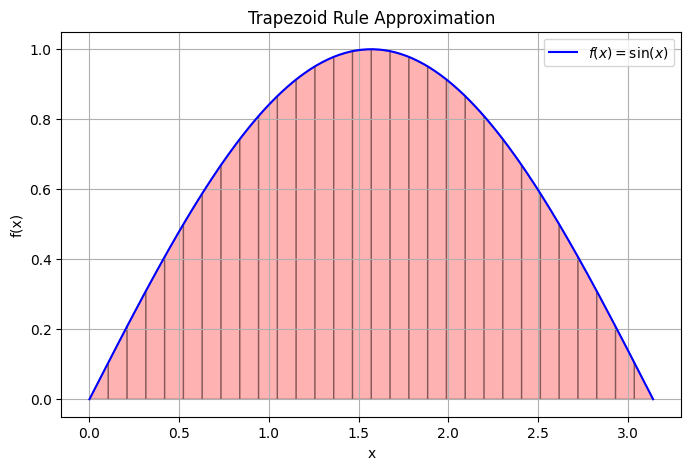

In [6]:
# Define the function and interval
a = 0
b = np.pi
n_intervals = 30
x = np.linspace(a, b, n_intervals+1)
h = (b - a) / n_intervals

# Function f(x) = sin(x)
f_values = np.sin(x)

# Compute the trapezoid rule approximation
I_trap = (h/2) * (f_values[0] + 2 * np.sum(f_values[1:-1]) + f_values[-1])
print("Trapezoid Rule Approximation:", I_trap)

# Plot the function and trapezoids
x_dense = np.linspace(a, b, 200)
plt.figure(figsize=(8, 5))
plt.plot(x_dense, np.sin(x_dense), 'b-', label=r'$f(x)=\sin(x)$')
for i in range(n_intervals):
    xs = [x[i], x[i], x[i+1], x[i+1]]
    ys = [0, f_values[i], f_values[i+1], 0]
    plt.fill(xs, ys, 'r', edgecolor='k', alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Trapezoid Rule Approximation')
plt.legend()
plt.grid(True)
plt.show()


### **Example 3.2**

In a practical application, the area under a power-versus-time curve yields the total energy consumed. In this GPT inspired real-world example, assume that the power consumption (in kW) over a 24-hour period is modeled by $ P(t)=1.5+0.5\sin\left(\frac{2\pi t}{24}\right) $, with $ t $ in hours. We use the trapezoid rule to approximate the total energy consumption (in kWh). The code generates the time grid, computes $ P(t) $, and plots the power curve along with the trapezoidal areas.

Total Energy Consumption (kWh): 36.0


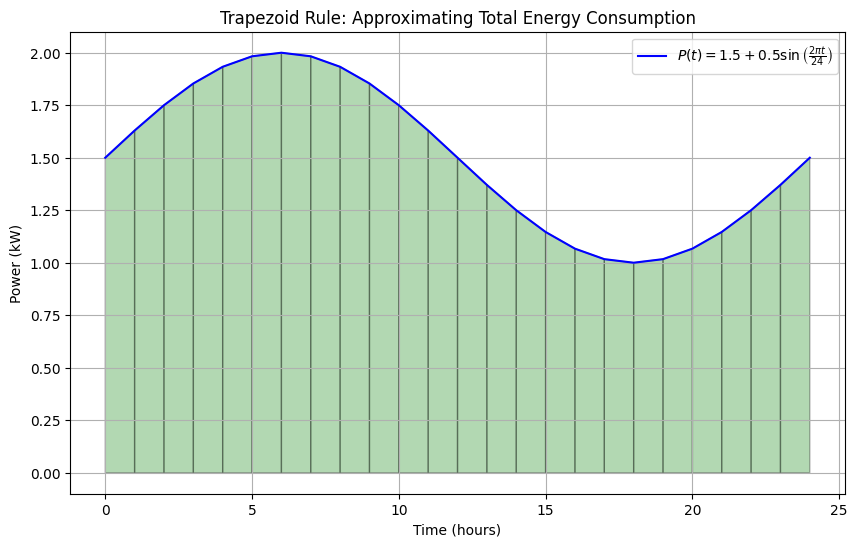

In [7]:
# Define the time interval (24 hours) and grid
t_start = 0
t_end = 24
n_points = 25  # 25 points gives 24 subintervals
t = np.linspace(t_start, t_end, n_points)
h = (t_end - t_start) / (n_points - 1)

# Define the power consumption function (in kW)
P = 1.5 + 0.5 * np.sin(2 * np.pi * t / 24)

# Compute the total energy consumption using the trapezoid rule (kWh)
energy = (h/2) * (P[0] + 2 * np.sum(P[1:-1]) + P[-1])
print("Total Energy Consumption (kWh):", energy)

# Plot the power consumption and trapezoidal approximation
plt.figure(figsize=(10, 6))
plt.plot(t, P, 'b-', label=r'$P(t)=1.5+0.5\sin\left(\frac{2\pi t}{24}\right)$')
for i in range(n_points - 1):
    xs = [t[i], t[i], t[i+1], t[i+1]]
    ys = [0, P[i], P[i+1], 0]
    plt.fill(xs, ys, 'g', edgecolor='k', alpha=0.3)
plt.xlabel('Time (hours)')
plt.ylabel('Power (kW)')
plt.title('Trapezoid Rule: Approximating Total Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()
